In [36]:
#Import thư viện 
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt


In [37]:
df = pd.read_csv('C:/Users/acer/OneDrive - Trường ĐH CNTT - University of Information Technology/NCKH/Machine Learning_Python/Data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [38]:
#Chọn biến để phân cụm 
X = df[['SeniorCitizen', 'tenure','MonthlyCharges','Churn','TotalCharges']]

In [39]:
X = df.drop(columns=['customerID', 'Churn'])
y = df['Churn'].map({'Yes': 1, 'No': 0})

X = pd.get_dummies(X, drop_first=True)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [40]:
inertia = []

K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(
        n_clusters=k,
        init='k-means++',
        random_state=42
    )
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

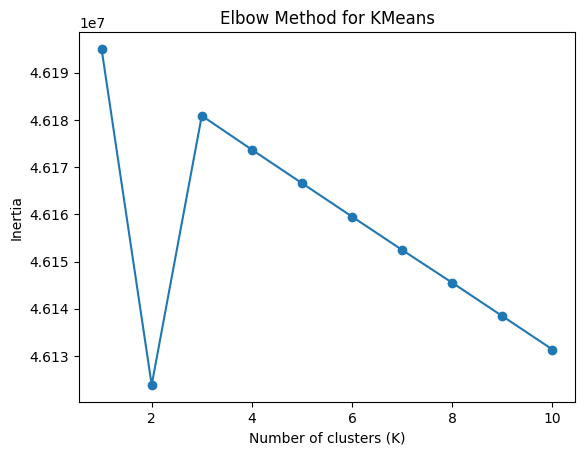

In [41]:
plt.figure()
plt.plot(K_range, inertia, marker='o')
plt.xlabel("Number of clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for KMeans")
plt.show()

In [42]:
kmeans = KMeans(
    n_clusters=4,
    init='k-means++',
    random_state=42
)

df['Cluster'] = kmeans.fit_predict(X_scaled)

In [43]:
score = silhouette_score(X_scaled, df['Cluster'])
print("Silhouette Score:", score)

Silhouette Score: -0.20417566057740777


In [44]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [45]:
df.groupby('Churn')[['tenure', 'MonthlyCharges', 'TotalCharges','SeniorCitizen']].mean()

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen
Churn,,,,
No,37.569965,61.265124,2555.344141,0.128721
Yes,17.979133,74.441332,1531.796094,0.254682


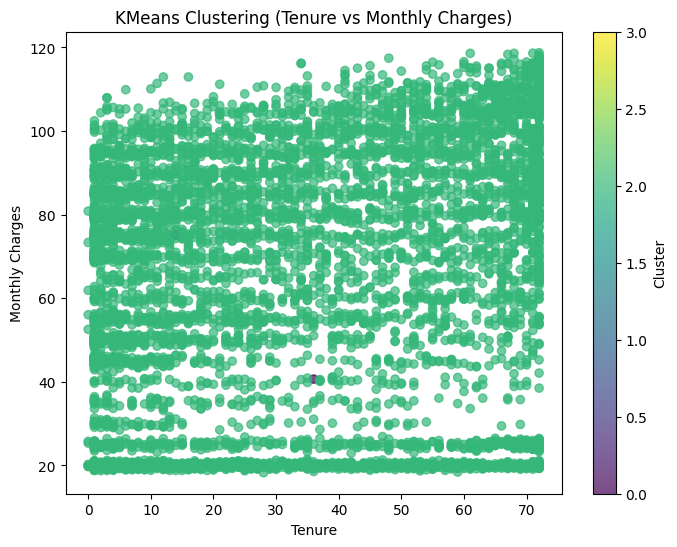

In [46]:
plt.figure(figsize=(8, 6))

plt.scatter(
    df['tenure'],
    df['MonthlyCharges'],
    c=df['Cluster'],
    alpha=0.7
)

plt.xlabel("Tenure")
plt.ylabel("Monthly Charges")
plt.title("KMeans Clustering (Tenure vs Monthly Charges)")
plt.colorbar(label="Cluster")
plt.show()
